In [1]:
# Import necessary libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from random import choice, sample

In [2]:

# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


In [4]:
df = pd.read_csv('GenAIKeywords.csv')
df.head()

,Publication Type,Authors,Author Full Names,Article Title,Document Type,Author Keywords,Keywords Plus
0,J,"Mannuru, NR; Shahriar, S; Teel, ZA; Wang, T; L...","Mannuru, Nishith Reddy; Shahriar, Sakib; Teel,...",Artificial intelligence in developing countrie...,Article; Early Access,generative AI; artificial intelligence; fourth...,HEALTH-CARE; INDUSTRIAL-REVOLUTION; INNOVATION...
1,J,"Kalota, F","Kalota, Faisal",A Primer on Generative Artificial Intelligence,Review,artificial intelligence; AI; generative artifi...,NaN
2,J,"Powell, SK","Powell, Suzanne K.",AI and Case Management: From Artificial Intell...,Editorial Material,artificial intelligence (AI); augmented artifi...,NaN
3,J,"Costa, F; Mónaco, JA; Covello, A; Novidelsky, ...","Costa, Flavia; Monaco, Julian Andres; Covello,...",Challenges of Generative Artificial Intelligen...,Article,Artificial intelligence; Generative Artificial...,NaN
4,J,"Agrawal, KP","Agrawal, Kalyan Prasad",Organizational Sustainability of Generative AI...,Article; Early Access,Generative AI; optimization intelligence; norm...,CHALLENGES


In [25]:
#listing keywords from 'Author Keywords' column
keywords = df['Author Keywords'].tolist()
keywords = [str(keyword) for keyword in keywords]
keywords

result = ','.join(map(str, keywords[:50]))

result = result.replace(';', '')
result

'generative AI artificial intelligence fourth industrial revolution developing countries technological change,artificial intelligence AI generative artificial intelligence generative AI GAI GenAI Gen-AI ChatGPT LLM GPT AI businesses AI education AI ethics AI security,artificial intelligence (AI) augmented artificial intelligence generative artificial intelligence predictive analytics,Artificial intelligence Generative Artificial Intelligence AI risks and safety artificial society,Generative AI optimization intelligence normalization process theory,generative AI health information technology artificial intelligence,forensic psychiatry forensic AI generative AI generative artificial intelligence discriminative AI ethical AI large language models large generative AI models,Generative artificial intelligence Artificial intelligence (AI) Augmented intelligence (AI) Mental health AI ChatGPT in mental health,Academia artificial intelligence generative AI research service teaching,Artificial i

In [26]:
nltk.download('punkt')
nltk.download('stopwords')

keywords_string = ' '.join(keywords)

# Tokenize the text into words
tokens = keywords_string.split(',')

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]

In [11]:
nltk.download('punkt')
nltk.download('stopwords')


keywords_string = ' '.join(keywords)

# Tokenize the text into words
tokens = keywords_string.split(' ')

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Remove punctuation and numbers
tokens = [word for word in tokens if word.isalpha()]

# Calculate frequency distribution
freq_dist = FreqDist(tokens)

# Convert frequency distribution to a DataFrame
Keywords_df = pd.DataFrame(freq_dist.most_common(), columns=['Word', 'Frequency'])

# Display the DataFrame
Keywords_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Frequency
0,artificial,661
1,generative,562
2,ai,170
3,language,145
4,intelligence,129
...,...,...
1303,tissue,1
1304,histological,1
1305,vertical,1
1306,application,1


In [ ]:
#taking the top 25 words to the network won't look too cluttered
network_df = Keywords_df.head(50)
network_df


In [ ]:
network_list = network_df['Word'].tolist()
network_list

In [80]:
'''G = nx.Graph()

# Iterate over each row in the DataFrame
for index, row in network_df.iterrows():
    keyword = row['Word']
    frequency = row['Frequency']

    # Add the keyword as a node if it doesn't already exist
    if not G.has_node(keyword):
        G.add_node(keyword)

    # Update the frequency of the keyword
    G.nodes[keyword]['Frequency'] = frequency

# Iterate over all pairs of keywords
for keyword1, keyword2 in itertools.combinations(network_df['Word'].unique(), 2):
    # Find the frequency of each keyword
    freq1 = network_df.loc[network_df['Word'] == keyword1, 'Frequency'].sum()
    freq2 = network_df.loc[network_df['Word'] == keyword2, 'Frequency'].sum()

    # Calculate the co-occurrence frequency
    co_occurrence_freq = len(network_df[(network_df['Word'] == keyword1) & (network_df['Word'] == keyword2)])

    # Add an edge between the keywords with the co-occurrence frequency as the weight
    if co_occurrence_freq > 0:
        G.add_edge(keyword1, keyword2, weight=co_occurrence_freq)

print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))'''

Nodes: [('artificial', {'Frequency': 661}), ('generative', {'Frequency': 562}), ('ai', {'Frequency': 170}), ('language', {'Frequency': 145}), ('intelligence', {'Frequency': 129}), ('adversarial', {'Frequency': 124}), ('deep', {'Frequency': 111}), ('nan', {'Frequency': 111}), ('machine', {'Frequency': 109}), ('large', {'Frequency': 94}), ('learning', {'Frequency': 66}), ('data', {'Frequency': 63}), ('digital', {'Frequency': 57}), ('medical', {'Frequency': 53}), ('neural', {'Frequency': 40}), ('image', {'Frequency': 39}), ('design', {'Frequency': 39}), ('academic', {'Frequency': 32}), ('technology', {'Frequency': 31}), ('natural', {'Frequency': 29}), ('health', {'Frequency': 27}), ('education', {'Frequency': 27}), ('higher', {'Frequency': 26}), ('networks', {'Frequency': 25}), ('drug', {'Frequency': 23})]
Edges: []


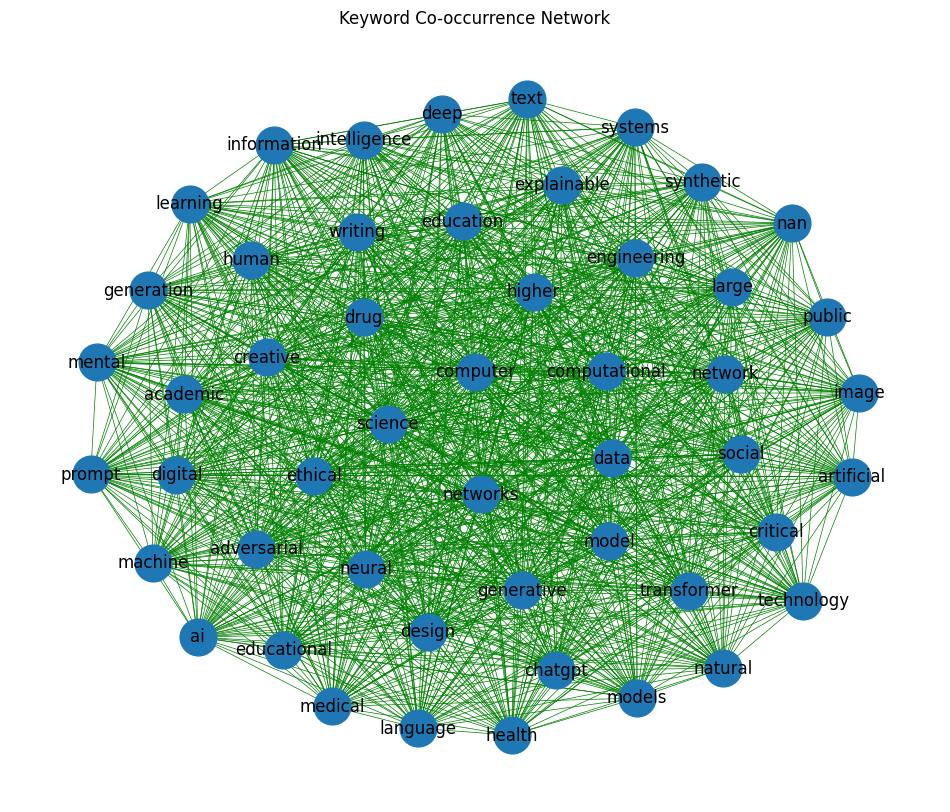

,Source,Target,Weight
0,intelligence,human,1
814,learning,critical,1
821,education,medical,1
820,education,science,1
819,education,mental,1
...,...,...,...
408,generative,data,1
407,generative,public,1
406,generative,generation,1
405,generative,information,1


In [30]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Tokenize the grocery lists
tokenized_lists = [list_.split() for list_ in result]

# Build co-occurrence network
G = nx.Graph()

for keyword1, keyword2 in itertools.combinations(set(network_df['Word']), 2):
    if G.has_edge(keyword1, keyword2):
        G[keyword1][keyword2]['weight'] += 1
    else:
        G.add_edge(keyword1, keyword2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scales edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width, edge_color='g')

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

# Convert edges to DataFrame and sort by weight
edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

This is the best looking visualization I have achieved so far but I know this does not accurately depict the keyword cocurrences because each word is only shown to have one connection with every other word. Furthermore, I am skeptical that every word is connected to so many others. My intuition is telling me this is not the case. So I went on to create another graphical representation below.

In [35]:
keyword_list = df['Author Keywords'].explode().tolist()
keyword_list = [str(keyword) for keyword in keywords]
keyword_list

['generative AI; artificial intelligence; fourth industrial revolution; developing countries; technological change',
 'artificial intelligence; AI; generative artificial intelligence; generative AI; GAI; GenAI; Gen-AI; ChatGPT; LLM; GPT; AI businesses; AI education; AI ethics; AI security',
 'artificial intelligence (AI); augmented artificial intelligence; generative artificial intelligence; predictive analytics',
 'Artificial intelligence; Generative Artificial Intelligence; AI risks and safety; artificial society',
 'Generative AI; optimization intelligence; normalization process theory',
 'generative AI; health information technology; artificial intelligence',
 'forensic psychiatry; forensic AI; generative AI; generative artificial intelligence; discriminative AI; ethical AI; large language models; large generative AI models',
 'Generative artificial intelligence; Artificial intelligence (AI); Augmented intelligence (AI); Mental health AI; ChatGPT in mental health',
 'Academia; arti

In [49]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Tokenize keywords
tokens_list = [keyword.split('; ') for keyword in keyword_list[:10]]

# Create co-occurrence matrix
co_occurrence_matrix = defaultdict(int)
for tokens in tokens_list:
    for pair in itertools.combinations(tokens, 2):
        co_occurrence_matrix[pair] += 1

# Create network graph
G = nx.Graph()
for pair, weight in co_occurrence_matrix.items():
    G.add_edge(pair[0], pair[1], weight=weight)

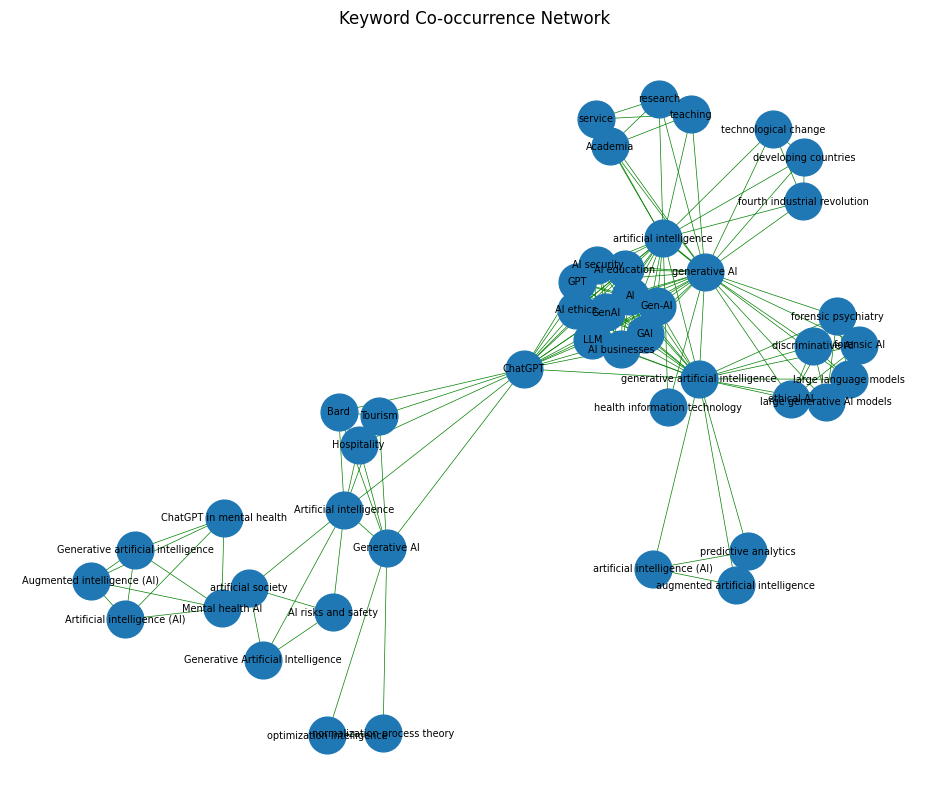

,Source,Target,Weight
0,generative AI,artificial intelligence,2
115,LLM,GPT,1
117,LLM,AI education,1
118,LLM,AI ethics,1
119,LLM,AI security,1
...,...,...,...
63,generative artificial intelligence,Gen-AI,1
64,generative artificial intelligence,ChatGPT,1
65,generative artificial intelligence,LLM,1
66,generative artificial intelligence,GPT,1


In [50]:
# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scales edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width, edge_color='g')


# Labels (with smaller font size)
nx.draw_networkx_labels(G, pos, font_size=7)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

# Convert edges to DataFrame and sort by weight
edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

This graph shows 2 instances of keyword 'generative AI'	occuring with the keyword 'artificial intelligence'. I also like this cocurrence network better because I can see how different research themes in generative AI are interconnected. For example, 'teaching' 'research' 'service' and 'academia' are located near each other which, in a way, form a sort of cluster. Terms like 'ChatGPT' and 'LLM' are very centralized as they are likely part of a broader theme of research.

In [32]:
#############################################END OF PROJECT 3####################################################################################
#############################################END OF PROJECT 3####################################################################################
#############################################END OF PROJECT 3####################################################################################
#############################################END OF PROJECT 3####################################################################################

In [19]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Tokenize the grocery lists
tokenized_lists = [list_.split() for list_ in keywords]

# Build co-occurrence network
G = nx.Graph()

for list_ in tokenized_lists:
    for keyword1, keyword2 in itertools.combinations(set(list_), 2):
        if G.has_edge(keyword1, keyword2):
            G[keyword1][keyword2]['weight'] += 1
        else:
            G.add_edge(keyword1, keyword2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scales edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width, edge_color='g')

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

# Convert edges to DataFrame and sort by weight
edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

KeyboardInterrupt: 

<Figure size 1200x1000 with 0 Axes>

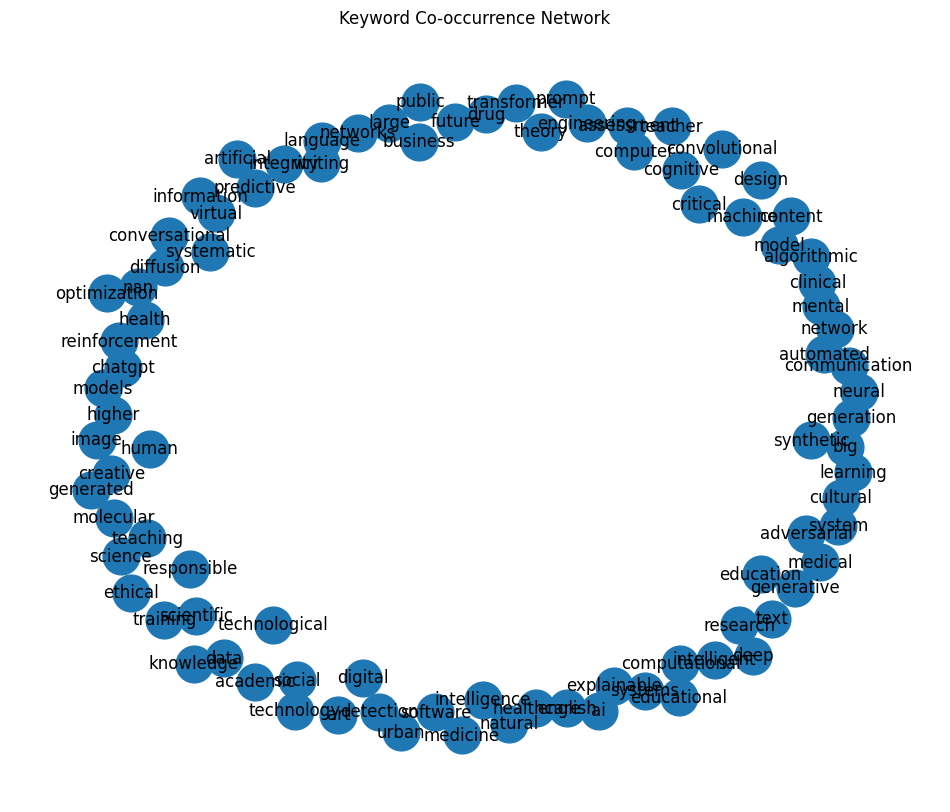

,Source,Target,Weight
0,convolutional,transformer,0
2675,software,generated,0
2662,software,knowledge,0
2663,software,research,0
2664,software,health,0
...,...,...,...
1340,critical,automated,0
1341,critical,generation,0
1342,critical,content,0
1343,critical,cognitive,0


In [93]:
#
# Build co-occurrence network
G = nx.Graph()

for keyword1, keyword2 in itertools.combinations(set(network_df['Word']), 2):
    if G.has_edge(keyword1, keyword2):
        G[keyword1][keyword2]['weight'] += network_df.loc[(network_df['Word'] == keyword1) & (network_df['Word'] == keyword2), 'Frequency'].sum()
    else:
        G.add_edge(keyword1, keyword2, weight=network_df.loc[(network_df['Word'] == keyword1) & (network_df['Word'] == keyword2), 'Frequency'].sum())

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.05 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width, edge_color='b')  # Set edge color to blue

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

# Convert edges to DataFrame and sort by weight
edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

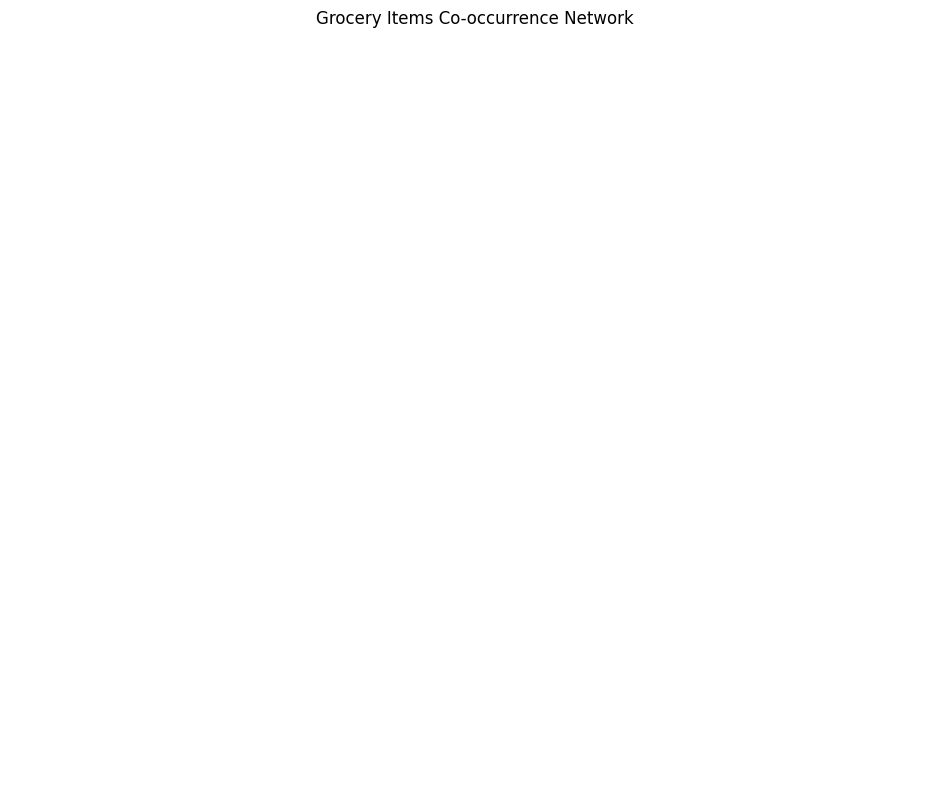

,Source,Target,Weight


In [18]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Tokenize the grocery lists
tokenized_lists = [list_.split() for list_ in network_list]

# Build co-occurrence network
G = nx.Graph()

for list_ in tokenized_lists:
    for item1, item2 in itertools.combinations(set(list_), 2):
        if G.has_edge(item1, item2):
            G[item1][item2]['weight'] += 1
        else:
            G.add_edge(item1, item2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Grocery Items Co-occurrence Network")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

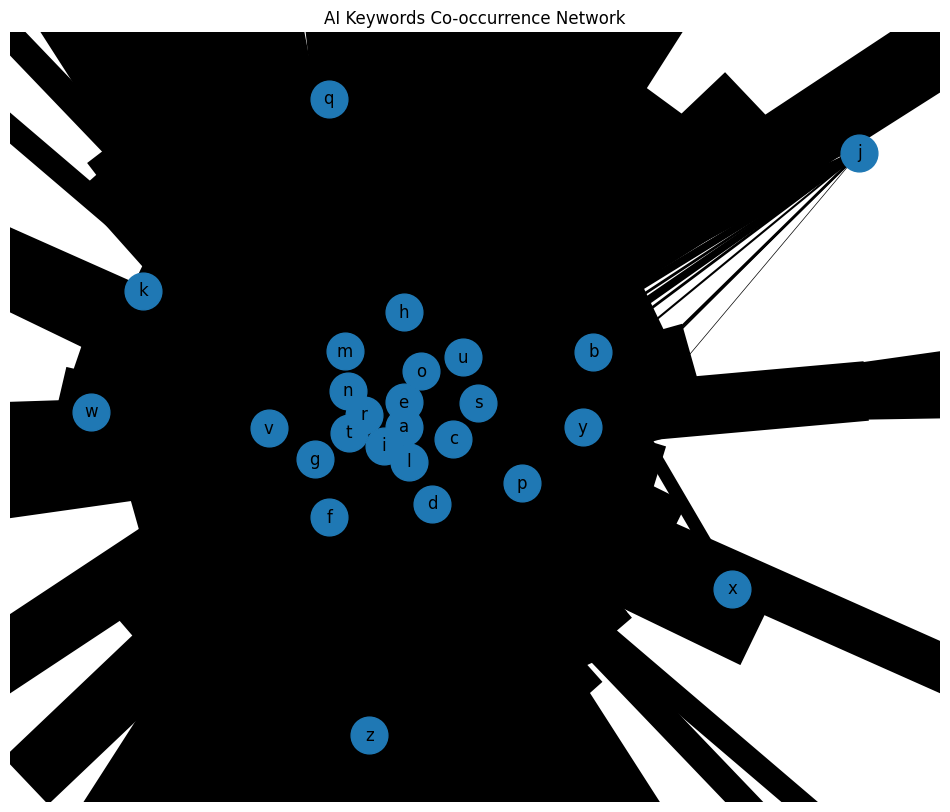

,Source,Target,Weight
3,a,i,2979
95,i,t,2531
5,a,t,2506
2,a,r,2410
72,r,i,2260
...,...,...,...
134,g,x,1
183,f,x,1
184,f,q,1
288,y,k,1


In [58]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Tokenize the grocery lists
tokenized_lists = [list_.split() for list_ in Keywords_df]

# Build co-occurrence network
G = nx.Graph()

for list_ in tokens:
    for item1, item2 in itertools.combinations(set(list_), 2):
        if G.has_edge(item1, item2):
            G[item1][item2]['weight'] += 1
        else:
            G.add_edge(item1, item2, weight=1)

# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scale edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("AI Keywords Co-occurrence Network")
plt.axis('off')
plt.show()

edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted

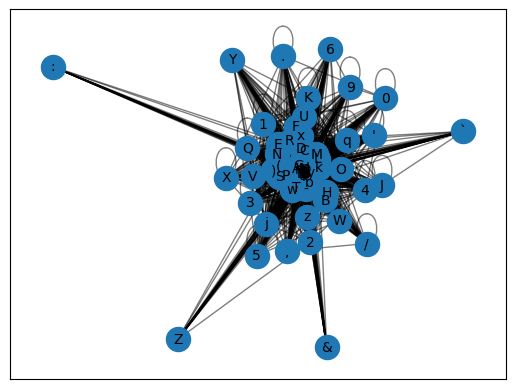

In [78]:
# Create a co-occurrence matrix
co_occurrence_matrix = {}

for keywords in keywords:
    for word1, word2 in itertools.combinations(keywords, 2):
        if (word1, word2) in co_occurrence_matrix:
            co_occurrence_matrix[(word1, word2)] += 1
        else:
            co_occurrence_matrix[(word1, word2)] = 1

# Create a graph
G = nx.Graph()

# Add nodes
for keyword in set(itertools.chain.from_iterable(keywords)):
    G.add_node(keyword)

# Add edges
for (word1, word2), weight in co_occurrence_matrix.items():
    G.add_edge(word1, word2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.show()

In [46]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Tokenize keywords
tokens_list = [keyword.split('; ') for keyword in keyword_list[:3]]

# Create co-occurrence matrix
co_occurrence_matrix = defaultdict(int)
for tokens in tokens_list:
    for pair in itertools.combinations(tokens, 2):
        co_occurrence_matrix[pair] += 1

# Create network graph
G = nx.Graph()
for pair, weight in co_occurrence_matrix.items():
    G.add_edge(pair[0], pair[1], weight=weight)

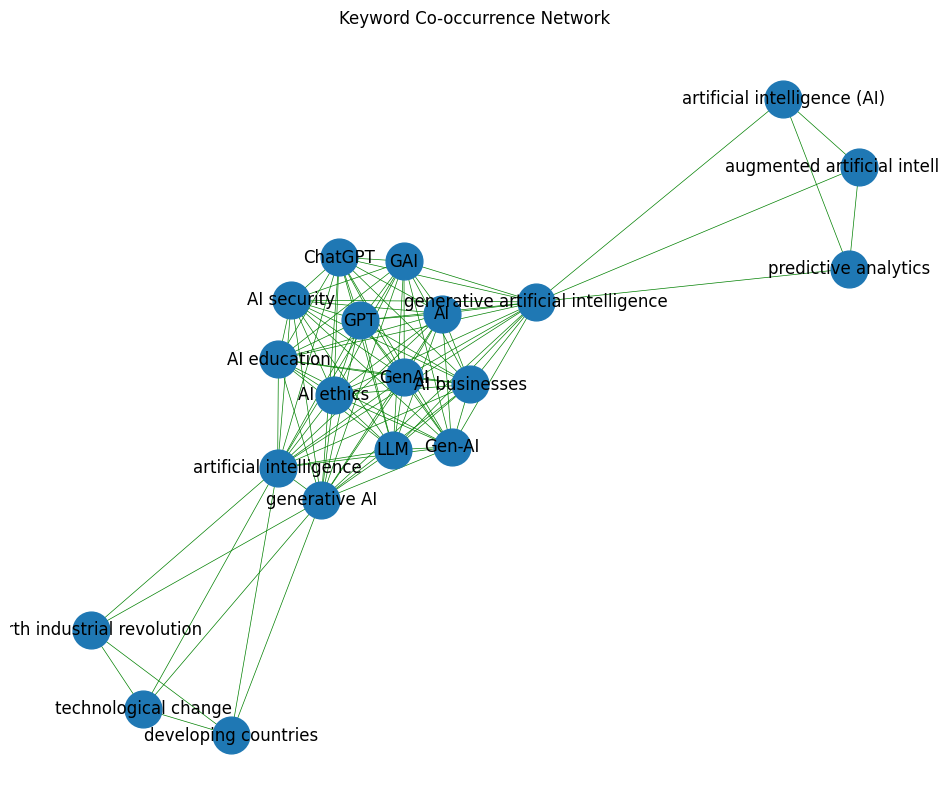

,Source,Target,Weight
0,generative AI,artificial intelligence,1
79,Gen-AI,AI education,1
77,Gen-AI,GPT,1
76,Gen-AI,LLM,1
75,Gen-AI,ChatGPT,1
...,...,...,...
32,fourth industrial revolution,technological change,1
31,fourth industrial revolution,developing countries,1
30,artificial intelligence,AI security,1
29,artificial intelligence,AI ethics,1


In [47]:
# Visualization with weighted edges
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
edge_width = [d['weight']*0.5 for _, _, d in edges]  # Scales edge widths by weight
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_width, edge_color='g')

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Keyword Co-occurrence Network")
plt.axis('off')
plt.show()

# Convert edges to DataFrame and sort by weight
edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
edges_df_sorted